# Demonstration

## 1 - Setup

### Film Data Setup

Please refer to [this](./data/film_config_template.yaml) YAML file as template. The film data can be merged with your review data if you wish to.

Once you have a film data YAML file, set up the path to it.

In [2]:
# Please replace the path with your own
FILM_DATA_FILE = "/Users/pipchang/Documents/VSC/Projects/DH-S/film_data/drive.yaml"

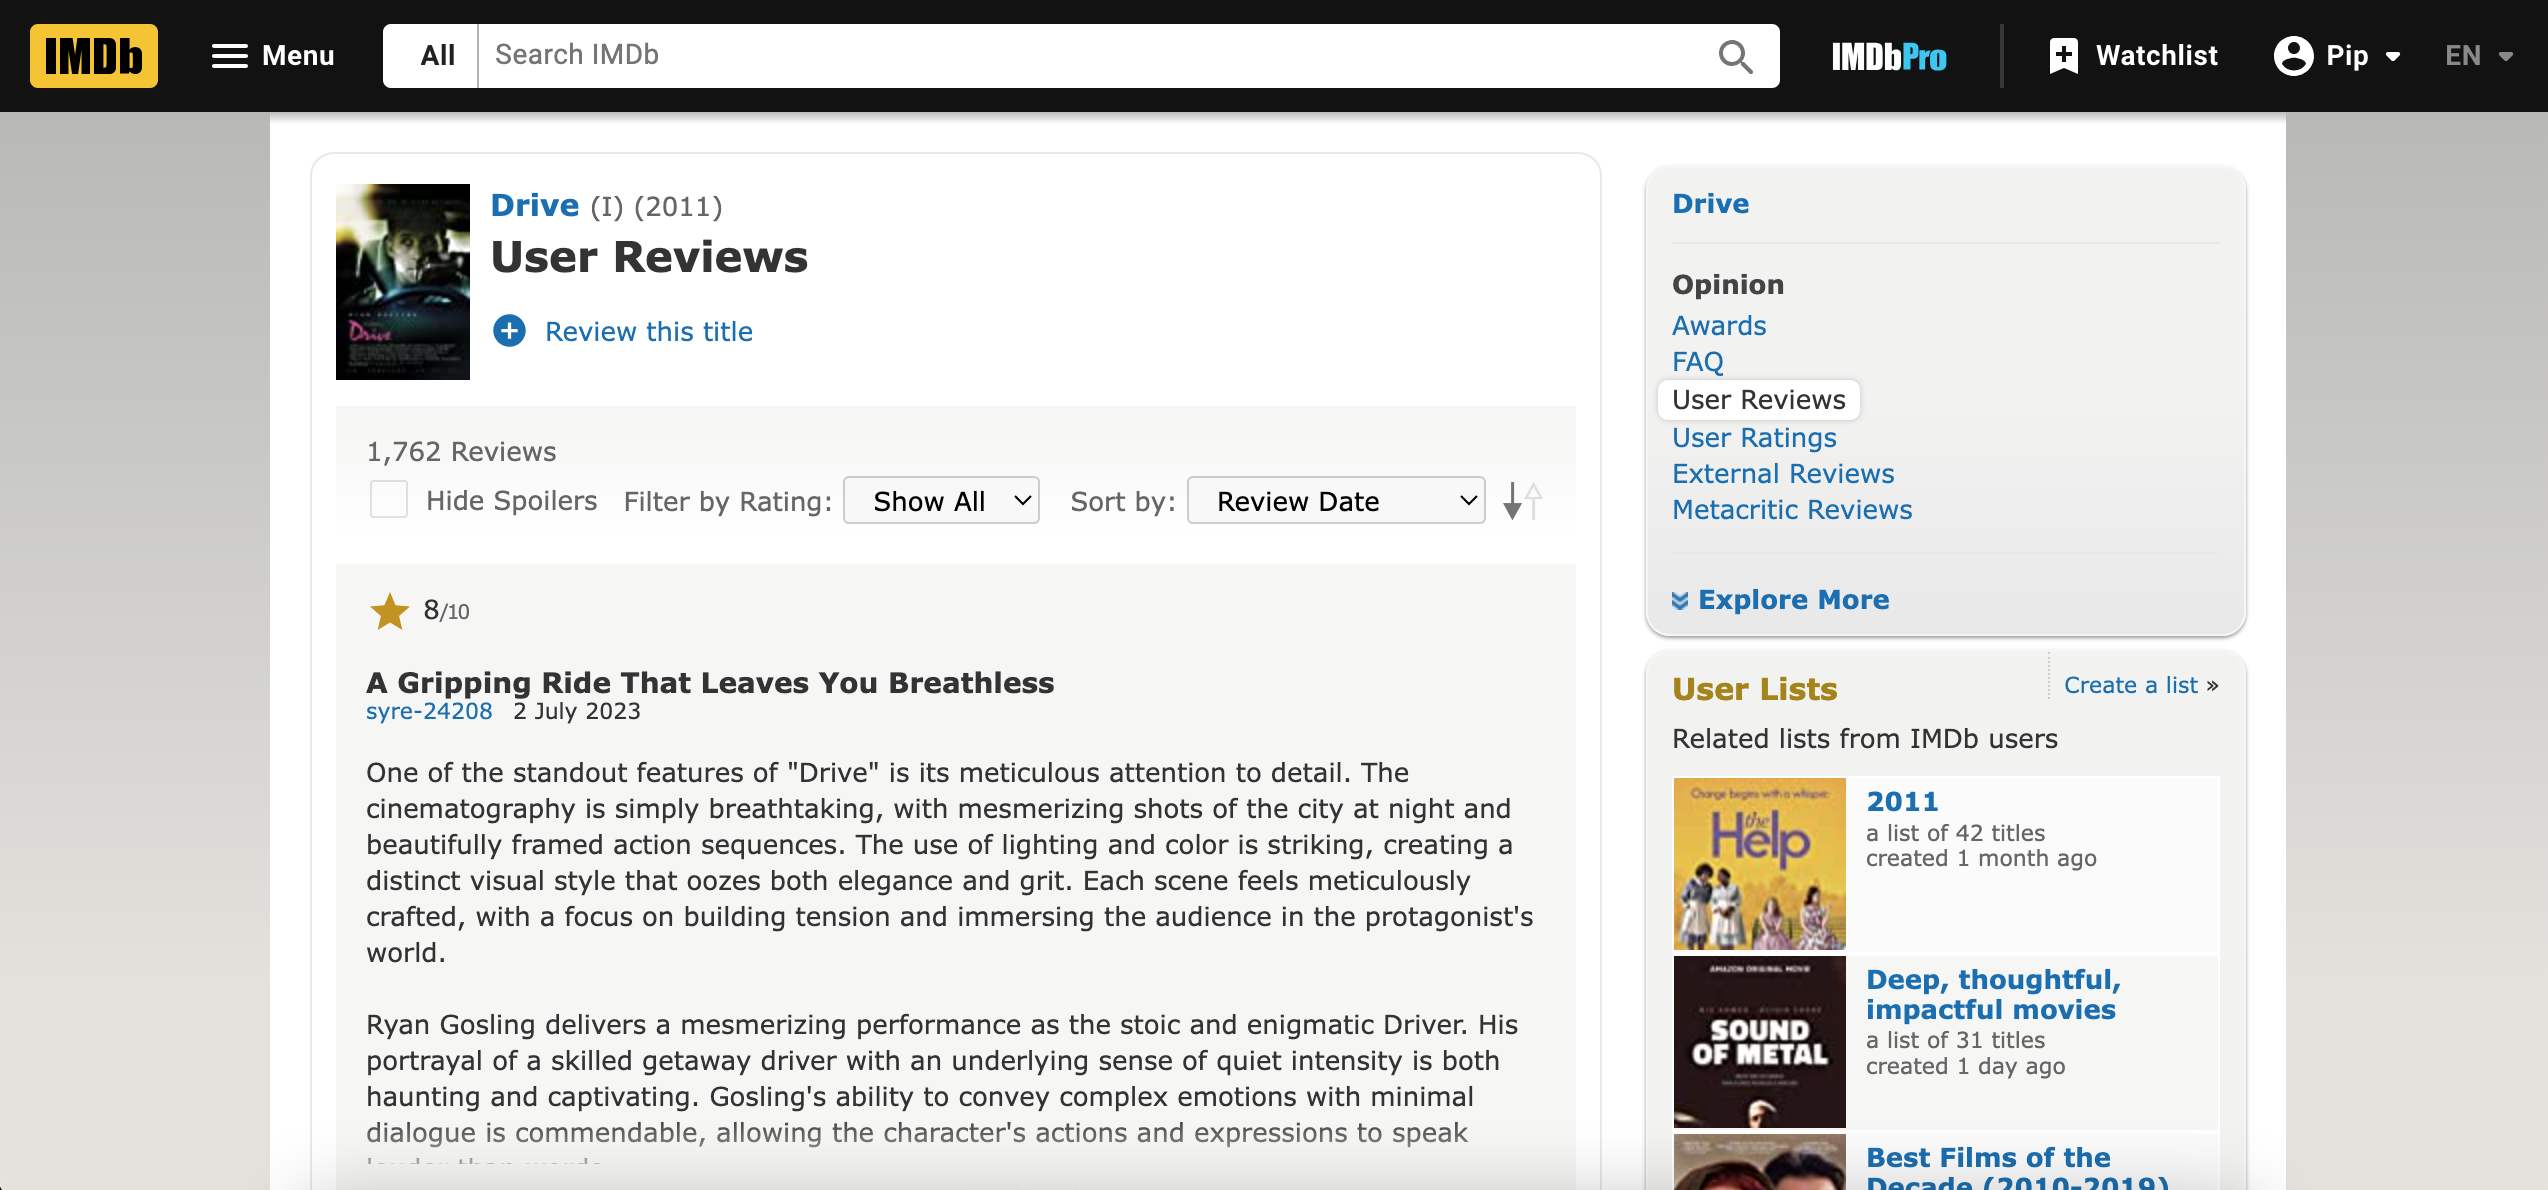

In [5]:
from IPython.display import Image
Image(filename='./data/imdb.png')

### Review Data Setup

Navigate to the film review page you want to scrape and copy the URL.

Currently, the package supports the following pages:

- IMDB audience review:

Note: the sorting option does not matter as all reviews can be retrieved

![Drive (2011) - IMDB](./data/imdb.png)

- Rotten Tomatoes audience review:

![Drive (2011) - Rotten Tomatoes](./data/rt.png)

- Douban audience short review

Note: due to website ristrictions, up to 600 short reviews can be retrieved under each sorting option when logged in (200 when not).

It is recommended to run it several times, each under a different sorting option.

![Drive (2011) - Douban Short](./data/db_short.png)

- Douban audiencelong review

Note: the scraper will first retrievd all long reviews' permalinks, then open each one to retrieve the review and the comments under the review

It takes a bit longer to run. The sorting option does not matter.

![Drive (2011) - Douban Long](./data/db_long.png)

After getting the needed URLs, you can set them up like this:

In [3]:
FILM_NAME = "Drive"
IMDB_URL = "https://www.imdb.com/title/tt0780504/reviews?sort=submissionDate&dir=desc&ratingFilter=0"
RT_URL = "https://www.rottentomatoes.com/m/drive_2011/reviews?type=user"
DB_SHORT_URL = "https://movie.douban.com/subject/2010972/comments?status=P"
DB_LONG_URL = "https://movie.douban.com/subject/2010972//reviews?sort=hotest"

## Folder Setup

You need to specify the folder path where you want to store the scraped reviews. 

If the folder does not exist yet, it will be created automatically.

In [4]:
# Please replace this with your own
OUTPUT_FOLDER = "/Users/pipchang/Documents/VSC/Projects/DH-S/download/Drive"

# 2 - Scraping

Essentially, every ```Website``` class has functions ```fetch_reviews``` (retrieve reviews in the form of Beautifulsoup objects) and ```parse_reviews``` (parse Beautifulsoup objects into certain ```Review``` dataclasses).

Note: you can run ```fetch_reviews``` in headless mode if you pass it the parameter ```headless_mode=True``` to run Chrome without an active window.

Please refer to the [Documentation]() for more specific parameters. 

Here are examples for each website:

In [ ]:
# IMDB
from film_review_scraper import IMDB
imdb = IMDB()
imdb_review_blocks = imdb.fetch_reviews(url=IMDB_URL)
imdb_reviews = imdb.parse_reviews(imdb_review_blocks)

In [ ]:
# Rotten Tomatoes
from film_review_scraper import RottenTomatoes
rt = RottenTomatoes()
rt_review_blocks = rt.fetch_reviews(url=IMDB_URL)
rt_reviews = rt.parse_reviews(rt_review_blocks)

In [ ]:
# Douban Short and Long
from film_review_scraper import Douban
db = Douban()

db_short_review_blocks = db.fetch_reviews(
    url=DB_SHORT_URL,
    review_type="short",
)
db_short_reviews = db.parse_reviews(review_blocks=db_short_review_blocks, parse_type="short")

db_long_review_blocks = db.fetch_reviews(
    url=DB_LONG_URL,
    review_type="long",
)
db_long_reviews = db.parse_reviews(review_blocks=db_long_review_blocks, parse_type="long")

## 3 - Storing Reviews

You can store your scraped reviews with ```save_dataclass_to_jsonl```. For example:

In [ ]:
from film_review_scraper import get_output_path, save_dataclass_to_jsonl

# Specify the file name
output_path = get_output_path(
    folder_path=OUTPUT_FOLDER,
    file_name=f"imdb_{FILM_NAME}_newest",  # You can change "newest" to something else based on the sorting option
    file_type="jsonl",
)

# Save to JSONL file
save_dataclass_to_jsonl(objects=imdb_reviews, output_path=output_path)

## 4 - Merging Film Data & Review Data

With all of your scraped review data in a folder, you can merge them all together and with film data into a single JSONL file.

Each line of JSONL file is a dictionary of film data and review data.

For example:

In [3]:
from film_review_scraper import get_output_path, FilmData, ReviewData, merge_film_and_review_data, save_dicts_to_jsonl

# Specify the folder where the review data files are
INPUT_FOLDER = "/Users/pipchang/Documents/VSC/Projects/DH-S/download/Drive"

# Specify the folder where you want to store the merged file
MERGED_FOLDER = "/Users/pipchang/Documents/VSC/Projects/DH-S/download/Drive/Merged"

# Get film data
film_data = FilmData.from_file(FILM_DATA_FILE)

# Get review data
review_data = ReviewData.from_folder(
    folder_path=INPUT_FOLDER, film_name=FILM_NAME
)

# Merge data
merged_data = merge_film_and_review_data(film_data=film_data, review_data=review_data)

# Store merged data
output_path = get_output_path(
    folder_path=MERGED_FOLDER, 
    file_name=f'{FILM_NAME}_Merged', 
    file_type="jsonl"
)
save_dicts_to_jsonl(list_of_dicts=merged_data, output_path=output_path)